In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
df = pd.read_csv('../../examples/EFIplus_medit.zip',compression='zip', sep=";")
df.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## 1. Run a PCA based on quantitative environmental variables (see previous exercise), using sites from the Douro, Tejo, Mondego and Minho basins. Produce a biplot with ‘Catchment_name’ as a grouping variable.

In [86]:
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

In [87]:
df_selected_catchments = df[df['Catchment_name'].isin(['Douro', 'Tejo', 'Mondego', 'Minho'])]
df_selected_catchments = df_selected_catchments.dropna()
df_selected_catchments.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
print(df_selected_catchments['Catchment_name'].value_counts())

Catchment_name
Minho      699
Douro      272
Tejo       235
Mondego     86
Name: count, dtype: int64


In [89]:
# Select only the environmental variables
X = df_selected_catchments[continuous_vars]
y = df_selected_catchments['Catchment_name']

# Scale the environmental variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_scaled)

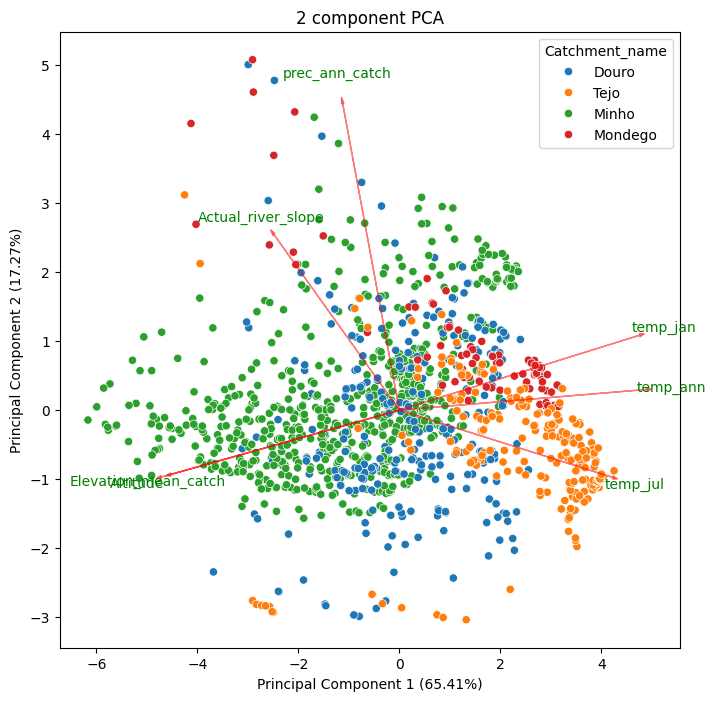

In [91]:


plt.figure(figsize = (8,8))
sns.scatterplot(x = 'principal component 1', y = 'principal component 2', hue = 'Catchment_name', data = pca_df)

# Add loadings for original variables (multiplied by 5 to better show the relationship)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(continuous_vars):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5, color='r', alpha=0.5, head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0]*1.1*5, loadings[i, 1]*1.1*5, var, color='g', ha='center', va='center')

plt.title('2 component PCA')
plt.xlabel('Principal Component 1 (' + str(round(pca.explained_variance_ratio_[0]*100, 2)) + '%)')
plt.ylabel('Principal Component 2 (' + str(round(pca.explained_variance_ratio_[1]*100, 2)) + '%)')
plt.show()

## 2. Using the same data, run a PCoA and project the sites using the resulting first two axis. Use also the ‘Catchment_name’ as a grouping variable.

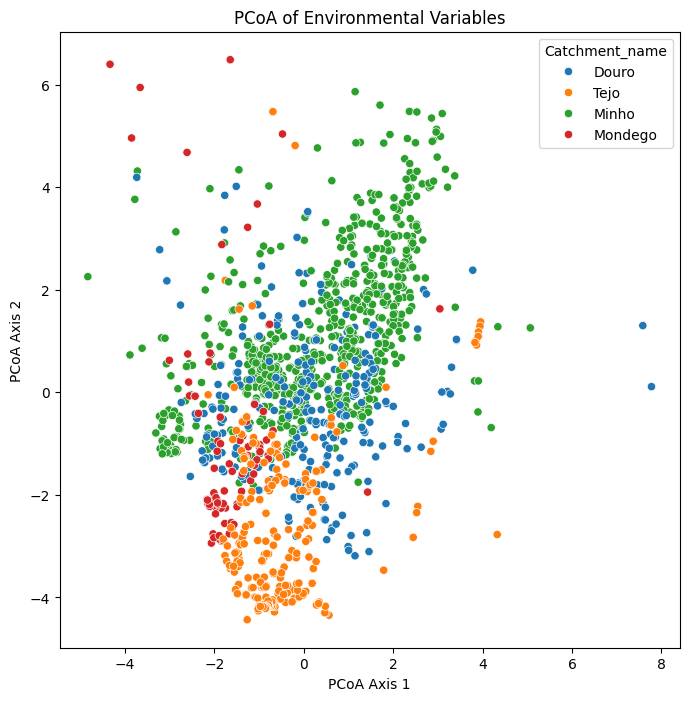

In [92]:
# Perform PCoA
mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
pcoa_result = mds.fit_transform(X_scaled)

# Create a DataFrame for the PCoA results
pcoa_df = pd.DataFrame(data=pcoa_result, columns=['PCoA axis 1', 'PCoA axis 2'])
pcoa_df = pd.concat([pcoa_df, df_selected_catchments[['Catchment_name']].reset_index(drop=True)], axis=1)

# Plot the PCoA results
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PCoA axis 1', y='PCoA axis 2', hue='Catchment_name', data=pcoa_df)

plt.title('PCoA of Environmental Variables')
plt.xlabel('PCoA Axis 1')
plt.ylabel('PCoA Axis 2')
plt.show()

## 3. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous exercises), using the Douro, Tejo, Mondego and Minho basins as the pre-determined groups. Produce a biplot with ‘Catchment_name’ as a grouping variable.

In [93]:
# Run LDA
lda = LinearDiscriminantAnalysis(n_components=2) # We are projecting onto 2 dimensions
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame for the LDA results
lda_df = pd.DataFrame(data=X_lda, columns=['LD 1', 'LD 2'])
lda_df = pd.concat([lda_df, df_selected_catchments[['Catchment_name']].reset_index(drop=True)], axis=1)

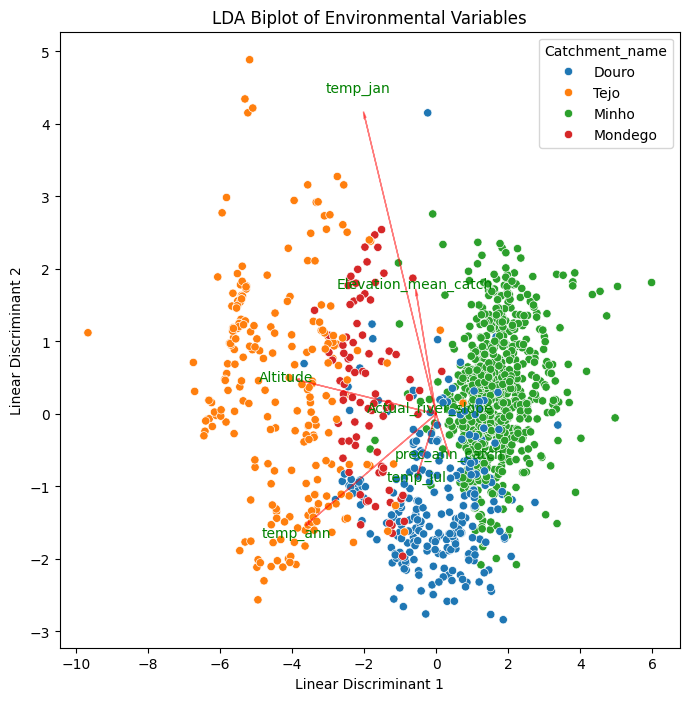

In [94]:
# Plot the LDA results
plt.figure(figsize=(8, 8))
sns.scatterplot(x='LD 1', y='LD 2', hue='Catchment_name', data=lda_df)

# The interpretation of loadings in LDA is different from PCA. These represent the scaling factors for the original features along the LDs.
loadings_lda = lda.scalings_
for i, var in enumerate(continuous_vars):
    arrow_scaling = 1
    plt.arrow(0, 0, loadings_lda[i, 0] * arrow_scaling, loadings_lda[i, 1] * arrow_scaling, color='r', alpha=0.5, head_width=0.05, head_length=0.1)
    plt.text(loadings_lda[i, 0] * arrow_scaling * 1.1, loadings_lda[i, 1] * arrow_scaling * 1.1, var, color='g', ha='center', va='center')


plt.title('LDA Biplot of Environmental Variables')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()